In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("kc-house-data.csv", sep=",")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
# df = pd.read_csv("laptop_price.csv", sep=",", encoding='latin-1')
# df.head()

### 1.2. Изучите стоимости недвижимости

In [11]:
data = df.groupby('price')['sqft_lot15'].agg(count='count').reset_index().sort_values(by='price')
data.head()

,price,count
0,75000.0,1
1,78000.0,1
2,80000.0,1
3,81000.0,1
4,82000.0,1


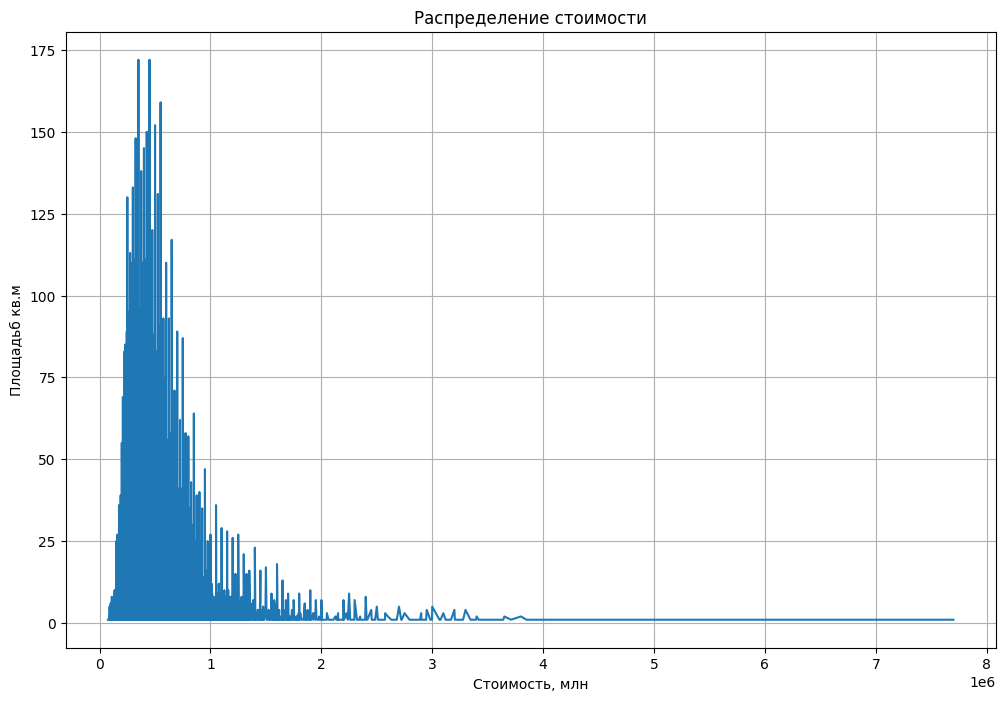

In [16]:
plt.figure(figsize=(12,8))
plt.plot(data['price'], data['count'])
plt.title('Распределение стоимости')
plt.xlabel('Стоимость, млн')
plt.ylabel('Площадьб кв.м')
plt.grid(True);

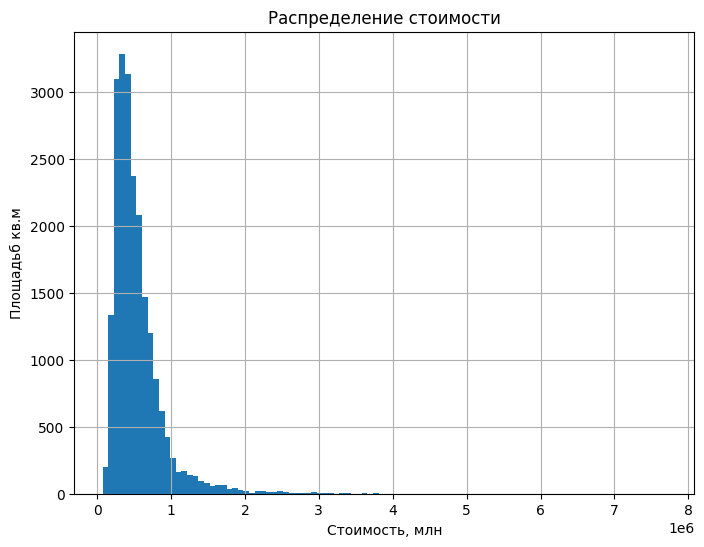

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=100)
plt.title('Распределение стоимости')
plt.xlabel('Стоимость, млн')
plt.ylabel('Площадьб кв.м')
plt.grid(True);


In [58]:
data = df['price'].value_counts().reset_index()
data.head()

,index,price
0,350000.0,172
1,450000.0,172
2,550000.0,159
3,500000.0,152
4,425000.0,150


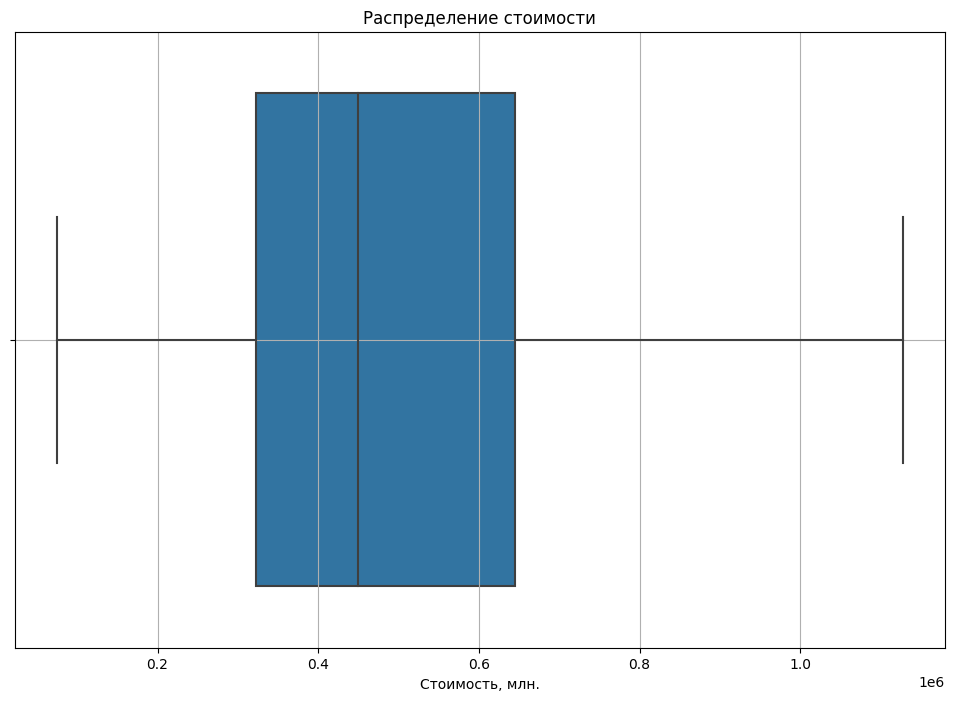

In [59]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['price'], showfliers=False)
plt.title("Распределение стоимости")
plt.xlabel("Стоимость, млн.")
plt.grid(True);

### Вывод:
#### Судя по графикам, мы можес сделать вывод, что большая часть домов находиться в ценовом диопазоне от 300 тыс до 650 тыс. Далее, с увеличением цены колличество домов плавно снижается,  а при достижении в стоимости дома 1,5 млн и выше, их колличество резко сокращается. Так же домов с ценой ниже 300 тыс имеется незначительное колличество.

### 1.3 Изучите распределение квадратуры жилой площади

In [62]:
data = df.groupby('sqft_living15')['price'].value_counts()
data.head() 

sqft_living15  price   
399            536000.0    1
460            257500.0    1
               378000.0    1
620            255000.0    1
               265000.0    1
Name: price, dtype: int64

In [17]:
data = df.groupby('sqft_living15')['yr_built'].agg(count='count').reset_index().sort_values(by='sqft_living15')
data.head()

,sqft_living15,count
0,399,1
1,460,2
2,620,2
3,670,1
4,690,2


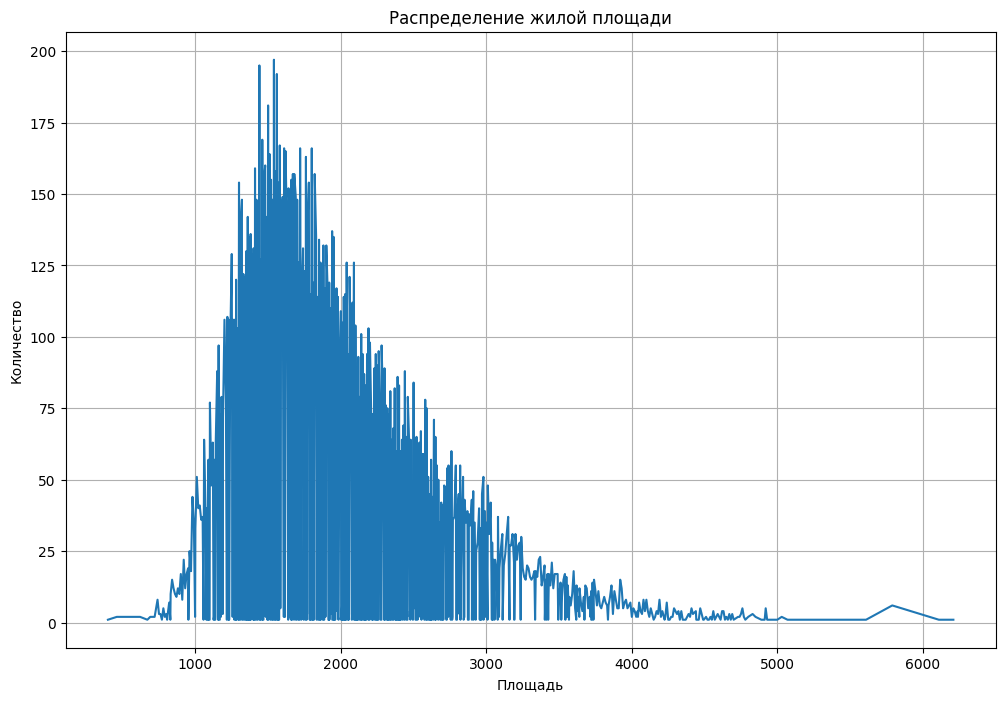

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(data['sqft_living15'], data['count'])
plt.title('Распределение жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.grid(True);

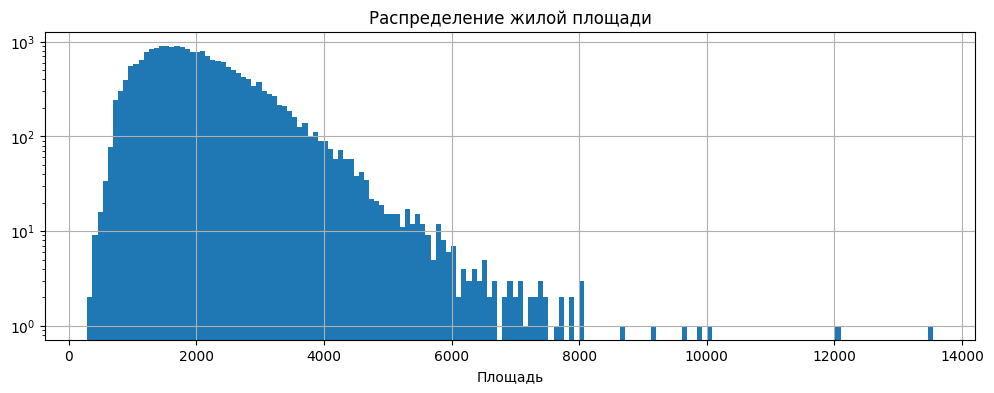

In [25]:
plt.figure(figsize=(12, 4))
plt.hist(df['sqft_living'], bins='auto', log=True)
plt.title("Распределение жилой площади")
plt.xlabel("Площадь")
plt.grid(True);

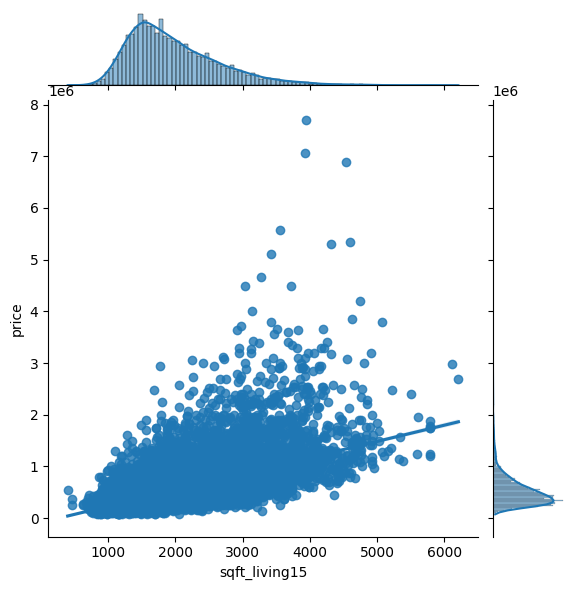

In [5]:
sns.jointplot(x=df['sqft_living15'], y=df['price'], kind='reg');

### Вывод:
#### Картина та же что и с ценой. Основное колличество домов имеют площадь от 1350 до 2600 кв. Далее у свеличением площади колличество домов плавно падает, а домов с площадью более 8000 кв. на рынке еденицы. Небольшое число домов и с квадратурой менее 1350. Так же мы можем отметиь, что в абсолютном большинстве, кроме отдельных случаев, цена находиться в прямой зависимости от площади жилого помещения.

### 1.4. Изучите распределение года постройки

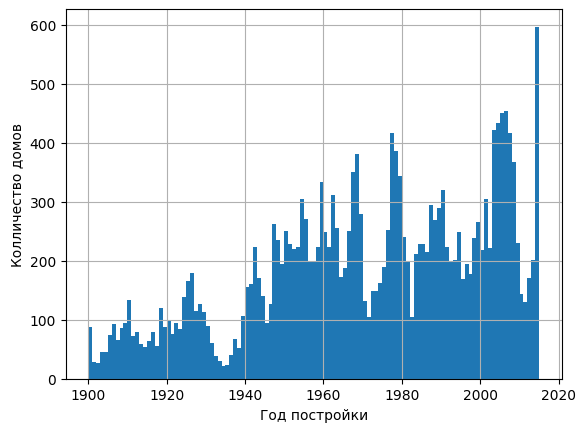

In [33]:
plt.hist(df['yr_built'], bins=range(df['yr_built'].min(), df['yr_built'].max() + 1))
plt.xlabel('Год постройки')
plt.ylabel('Колличество домов')
plt.grid();


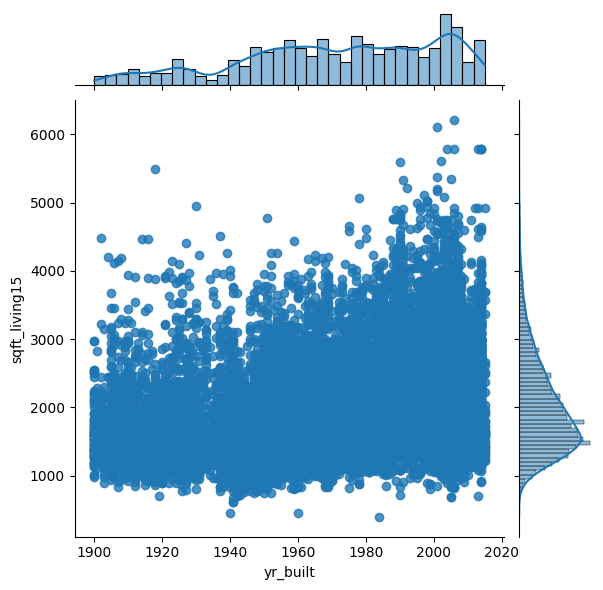

In [9]:
sns.jointplot(x=df['yr_built'], y=df['sqft_living15'], kind='reg');

### Вывод:
#### С 1900 по 2020 гг наблюдается постепенный рост строительства. Вместе с тем, мы наблюдаем периодические провалы, совпадающие со спадом экономики и кризисами. Например, в период с 1930 по 1939 гг. мы видим практически полную приостановку в строительстве домов, что совпадает с временем великой депрессии в США. Так же, мы можем заметить, что с 1940 по 2020 гг щилая площадь постройки домов в среднем плавно увеличивается, в сравнении с боее ранними периодами.

### Условие 2: 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную

In [43]:
def calcExplodes(data):
    exp = []
    k = 1
    for val in data.values:
        if val < data.values.sum() / 20:
            exp.append(0.3 * k)
            k += 1
        else:
            exp.append(0)
    return exp

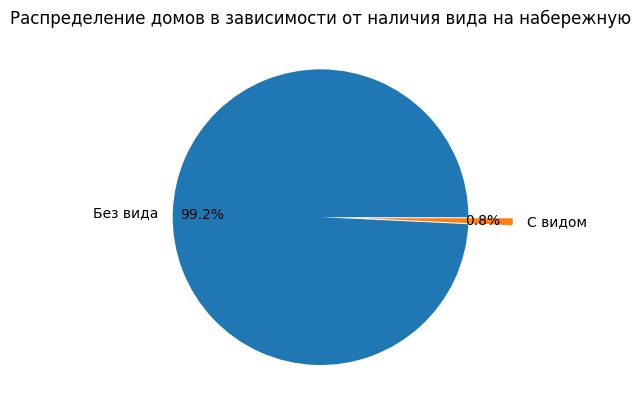

In [44]:
data = df['waterfront'].value_counts()
data.index = [
    "Без вида",
    "С видом"
]
plt.pie(
    data.values,
    labels=data.index,
    autopct='%1.1f%%',
    pctdistance=0.8,
    explode=calcExplodes(data)
)
plt.title("Распределение домов в зависимости от наличия вида на набережную");

In [45]:
data = df.groupby('waterfront')['price'].agg(count='count').reset_index().sort_values(by='waterfront')
data.head()

,waterfront,count
0,0,21450
1,1,163


#### Вид на набережную имеет меньше одного процента домов

### 2.2 Изучите распределение этажей домов

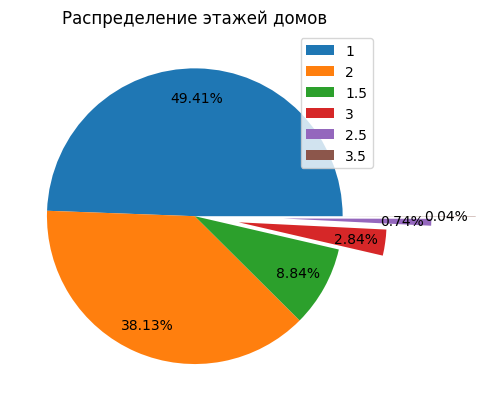

In [45]:
data = df['floors'].value_counts()
data.index = [
    str(el).split(".")[0]
    if el % 1 == 0
    else str(el)
    for el in data.index
]

plt.pie(
    data,
    autopct='%1.2f%%',
    pctdistance=0.8,
    explode=calcExplodes(data)
)

plt.legend(data.index)
plt.title("Распределение этажей домов");

### Практически половина домов имеют 1 этаж. 2-е место по колличеству занимают двухжтажные дома. Далее, с увеличением колличества этажей, число домов резко снижается

### 2.3 Изучите распределение состояния домов

In [31]:
df = pd.read_csv("kc-house-data.csv", sep=",")
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [38]:
data = df['condition'].value_counts().to_frame()
data.head()

,condition
3,14031
4,5679
5,1701
2,172
1,30


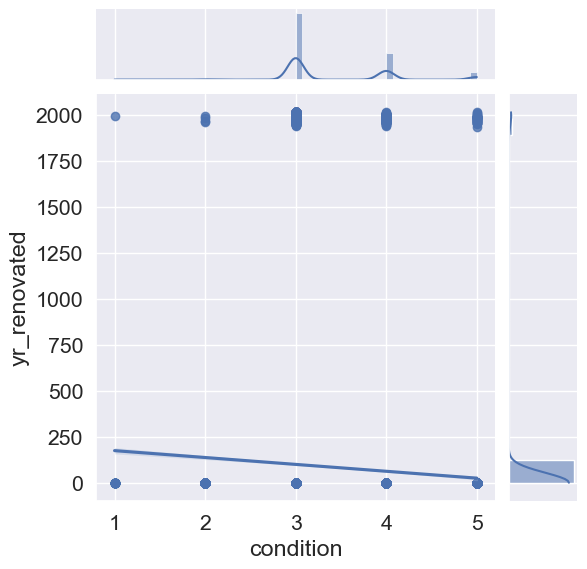

In [41]:
sns.jointplot(x=df['condition'], y=df['yr_renovated'], kind='reg');

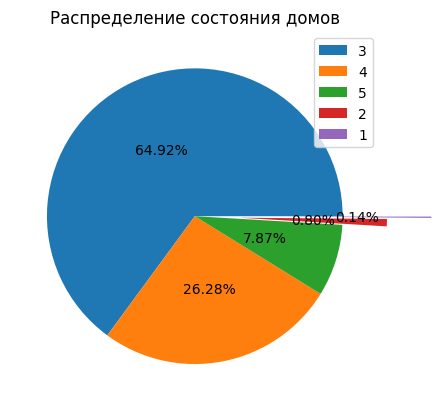

In [80]:
data = df['condition'].value_counts()
plt.pie(data, autopct='%1.2f%%', pctdistance=0.5, explode=calcExplodes(data))
plt.legend(data.index)
plt.title("Распределение состояния домов");

### Вывод:
#### Большинство домов находится в неплохом состоянии. Гораздо меньший процент домов имеет отличное состояние. Ветхие дома составляют меньше одного процента от общей массы.

### 3 Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

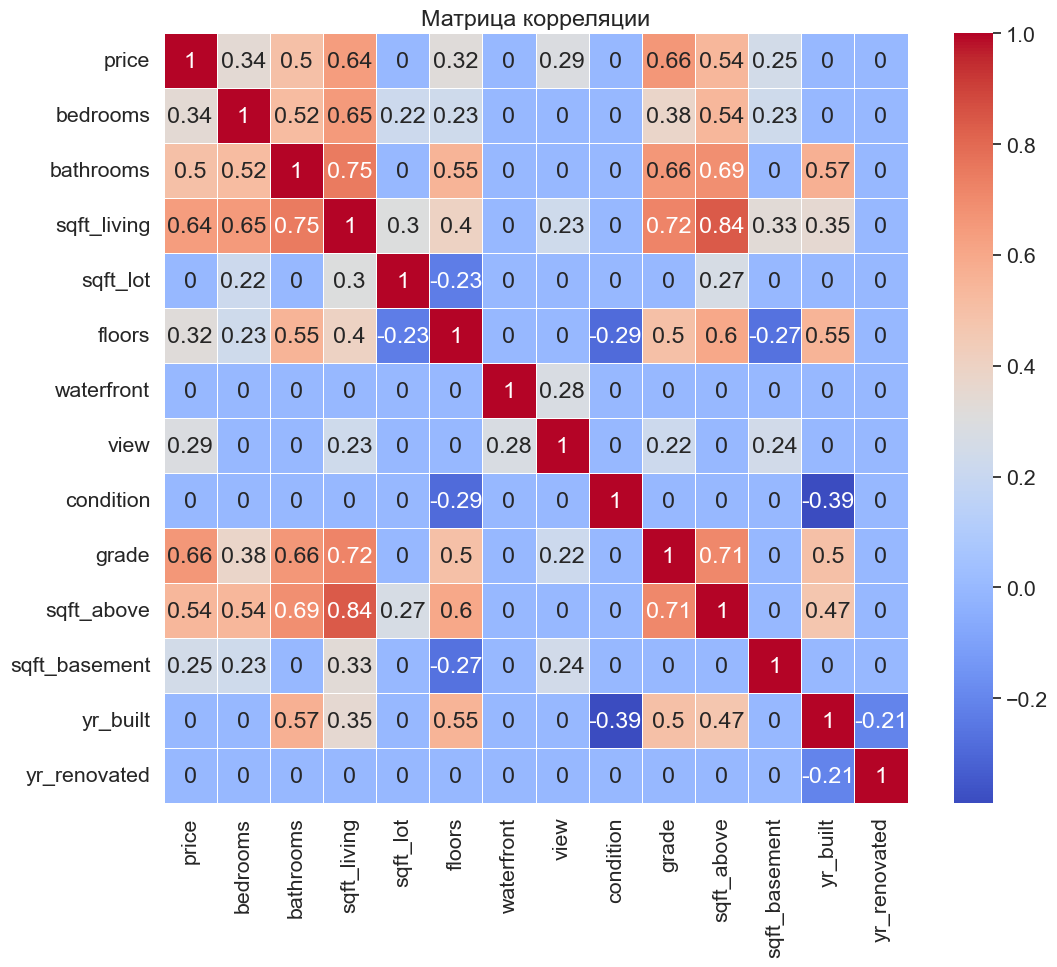

In [22]:
plt.figure(figsize=(12, 10))

corr_matrix = round(df.drop(
    columns=['id', 'date', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
).corr(method='spearman'), 2)
corr_matrix[abs(corr_matrix) < 0.2] = 0
sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляции');

### Вывод: 
#### Если рассматривать цену дома, то не найдена корреляция с этажностью и площадью участка, а также состоянием. Зато цена сильно зависит от жилой площади и в меньшей степени от количества спален и ванных. То, что цена зависит от площади чердака, говорит о большом распростанении 1-но этажных домов.

### Посмотрим зависимость цены от жилой площади

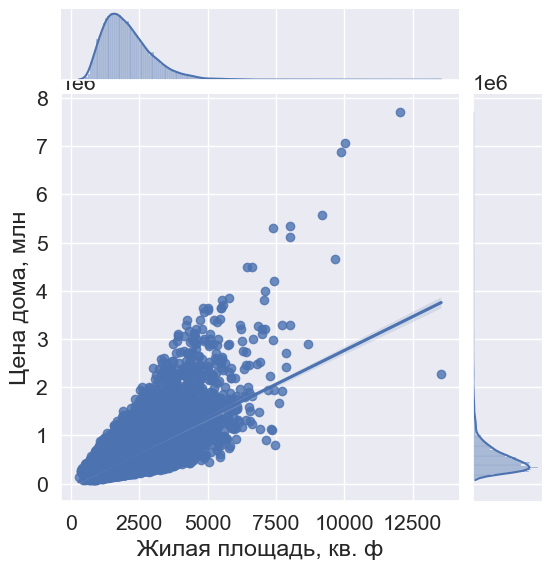

In [42]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg')

plt.xlabel("Жилая площадь, кв. ф")
plt.ylabel("Цена дома, млн");

#### Мы видим прямую зависимость цены дома от его площади. При этом она ярко выражена у домов с небольшой площадью и ценой. С увеличением площади разброс в цене стаовиться более заметным. Что говорит о большем влиянии других факторов, для людей, которые могут себе позволить дома побольше.

In [44]:
def formDepData (col1, col2, df):
    data = df.groupby(col1) \
        .agg({col2: 'mean'}) \
        .sort_index().reset_index()
    
    data[col1] = data[col1].apply(
        lambda val:
            str(val) 
    )

    return data

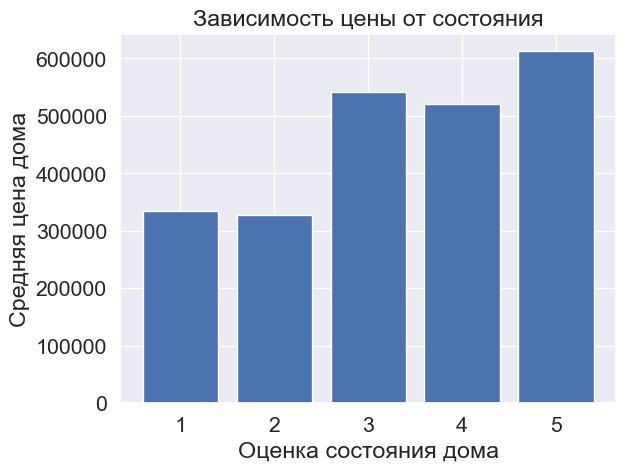

In [45]:
data = formDepData('condition', 'price', df)

plt.bar(data['condition'], data['price'])

plt.title("Зависимость цены от состояния")
plt.xlabel("Оценка состояния дома")
plt.ylabel("Средняя цена дома");

#### Мы видим, что особой разницы в цене между домами с неплохим и хорошим ремонтом нет, но дома с плохим ремонтом и вовсе без него, продаются на рынке значительно дешевле. 

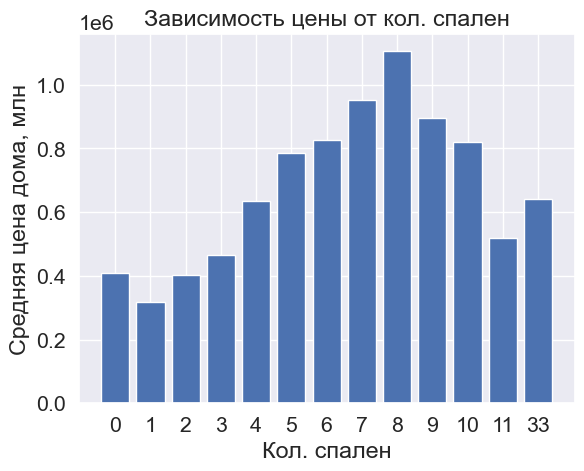

In [66]:
data = formDepData('bedrooms', 'price', df)

plt.bar(data['bedrooms'], data['price'])

plt.title("Зависимость цены от кол. спален")
plt.xlabel("Кол. спален")
plt.ylabel("Средняя цена дома, млн");

#### Дома без спален, ориентированы на какие-то специальые требования (возможно, студии), что делает их немного дороже, чем дома с 2-мя спальнями. Для домов с 1 по 8 спален прослеживается равномерный рост цены. Дома с большим количеством спален, ориентированы на несколько семей, имеют более простые условия, и уменьшаются в цене.

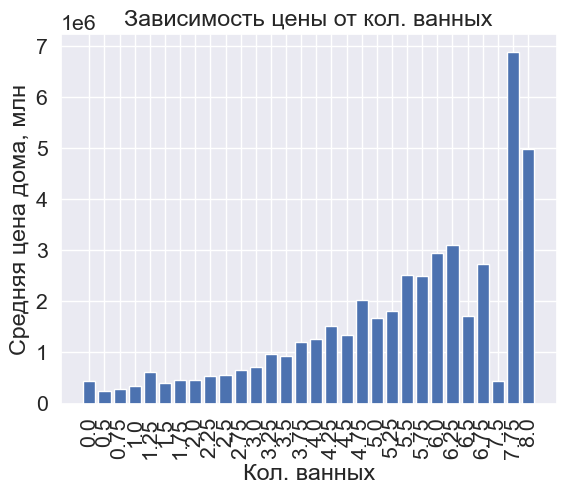

In [49]:
data = formDepData('bathrooms', 'price', df)

plt.bar(data['bathrooms'], data['price'])

plt.xticks(rotation=90)
plt.title("Зависимость цены от кол. ванных")
plt.xlabel("Кол. ванных")
plt.ylabel("Средняя цена дома, млн");

#### Наблюдается практически равномерный рост цен при увеличении числа ванных. Есть выбросы, соответствующие, домам типа townhouse.

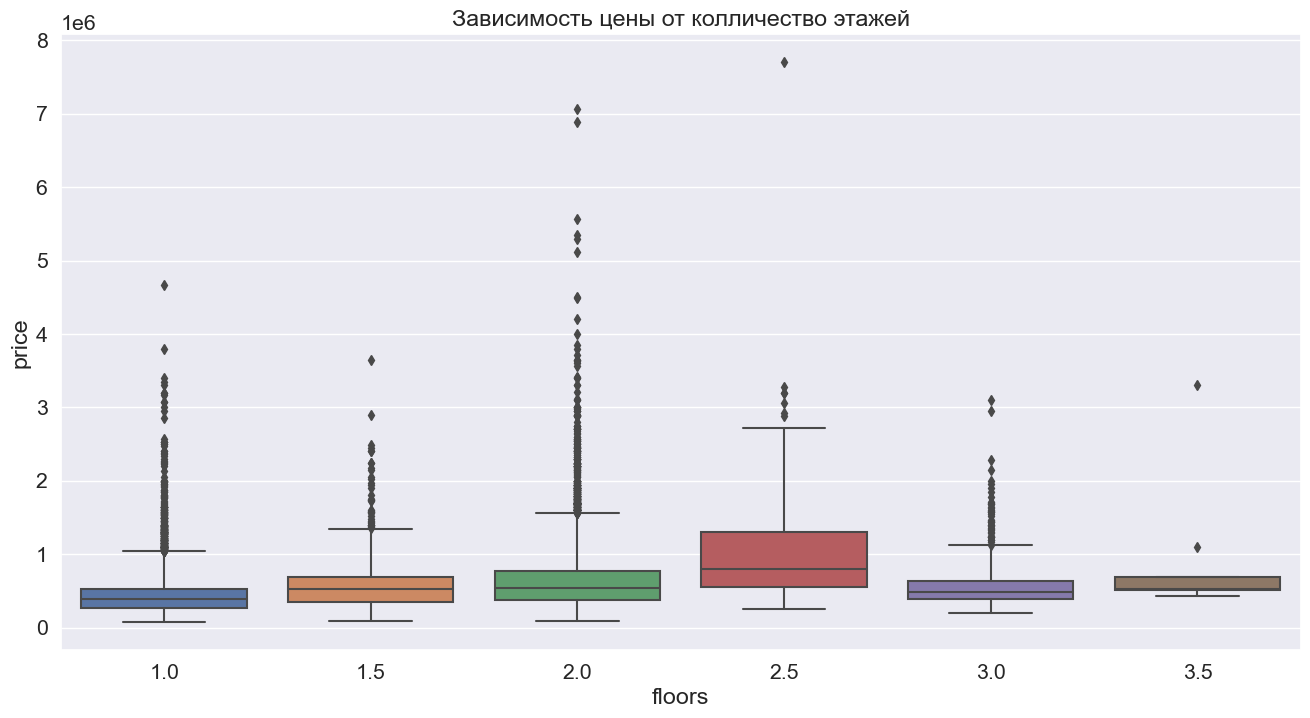

In [68]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['floors'], y=df['price'], whis=2)

plt.xlabel('floors')
plt.ylabel('price')
plt.title('Зависимость цены от колличество этажей');

#### Как мы видим колличество этажей не осообо влияет на цену дома. Однако, 2-х этажные дома (с чердаком или без) ценятся на рынке больше остальных.